In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [51]:
df = pd.read_csv("bank-additional.csv",delimiter=';')
df.rename(columns={'y':'deposit'}, inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [52]:
df.info()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [53]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


In [54]:
df.shape

(4119, 21)

In [55]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [56]:
df.dtypes.value_counts()

object     11
int64       5
float64     5
Name: count, dtype: int64

In [57]:
df.duplicated().sum()

0

In [58]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64

In [62]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)

num_cols = df.select_dtypes(exclude='object').columns
print(num_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'deposit'],
      dtype='object')
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [63]:
df.describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,deposit
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,3668


In [64]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,deposit
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,3668


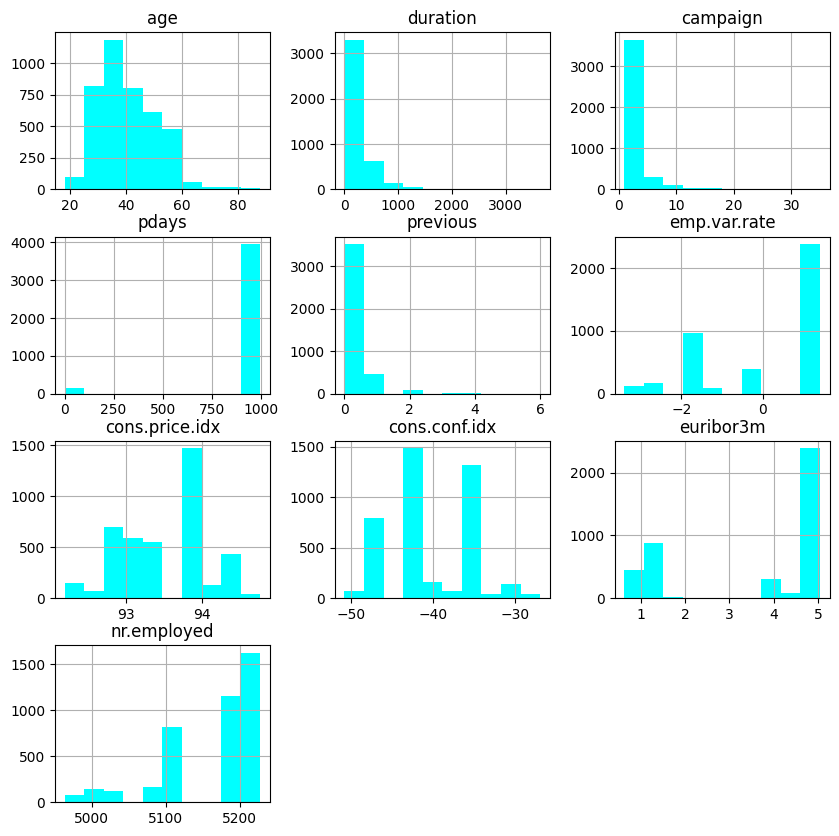

In [65]:
df.hist(figsize=(10,10),color='#00FFFF')
plt.show()

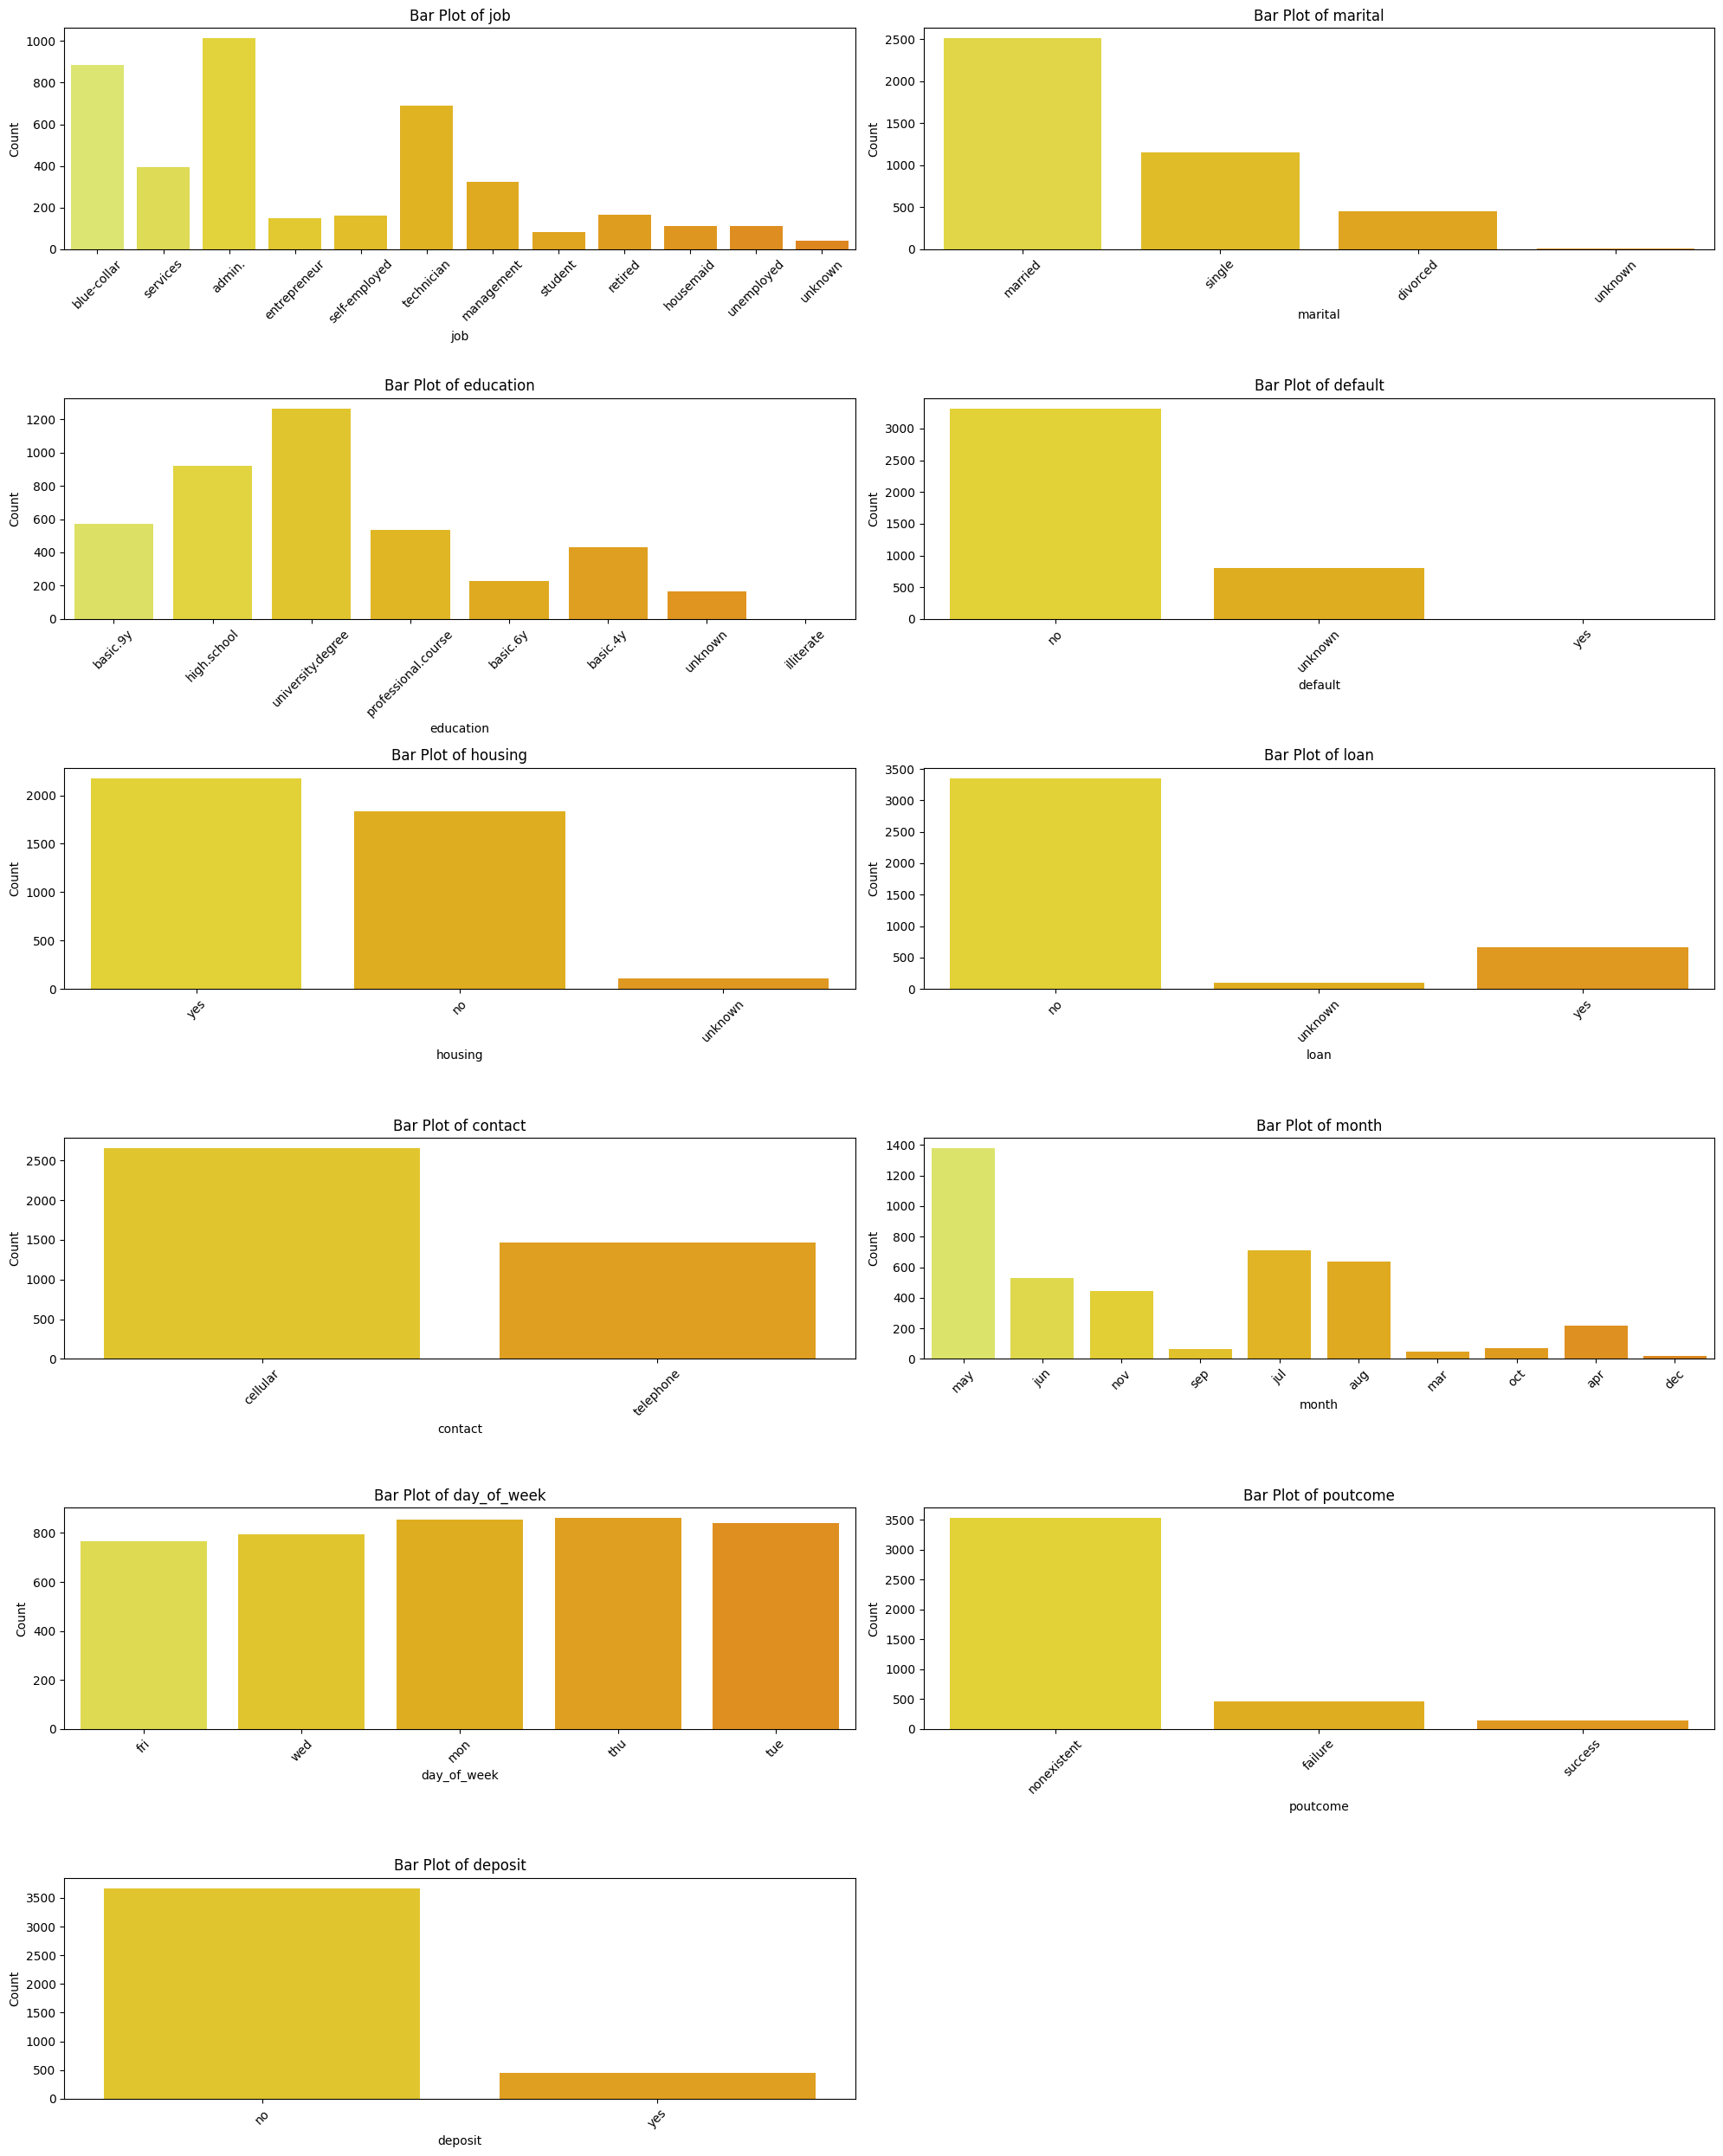

In [66]:
# Calculate the number of rows and columns for subplots
num_plots = len(cat_cols)
num_rows = (num_plots + 1) // 2  # Add 1 and divide by 2 to round up for odd numbers
num_cols = 2

# Create a new figure
plt.figure(figsize=(20, 25))  # Adjust the figure size as needed

# Loop through each feature and create a countplot
for i, feature in enumerate(cat_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(x=feature, data=df, palette='Wistia')
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

# Adjust layout to prevent overlap of subplots
plt.tight_layout()
plt.show()

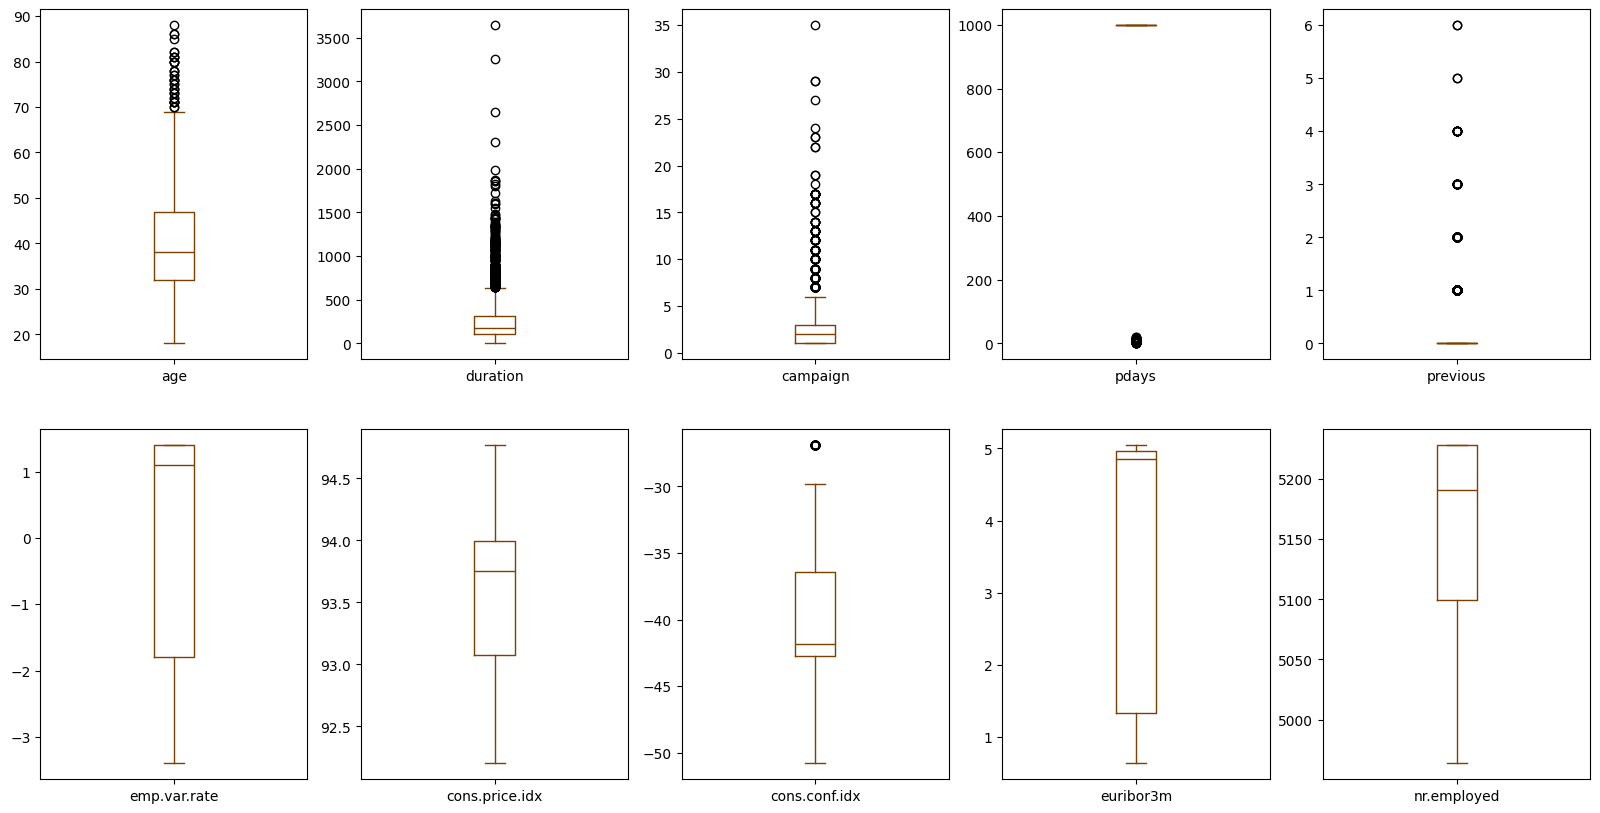

In [67]:
df.plot(kind='box', subplots=True, layout=(2,5),figsize=(20,10),color='#7b3f00')
plt.show()

In [70]:
column = df[['age','campaign','duration']]
q1 = np.percentile(column, 25)
q3 = np.percentile(column, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df[['age','campaign','duration']] = column[(column > lower_bound) & (column < upper_bound)]

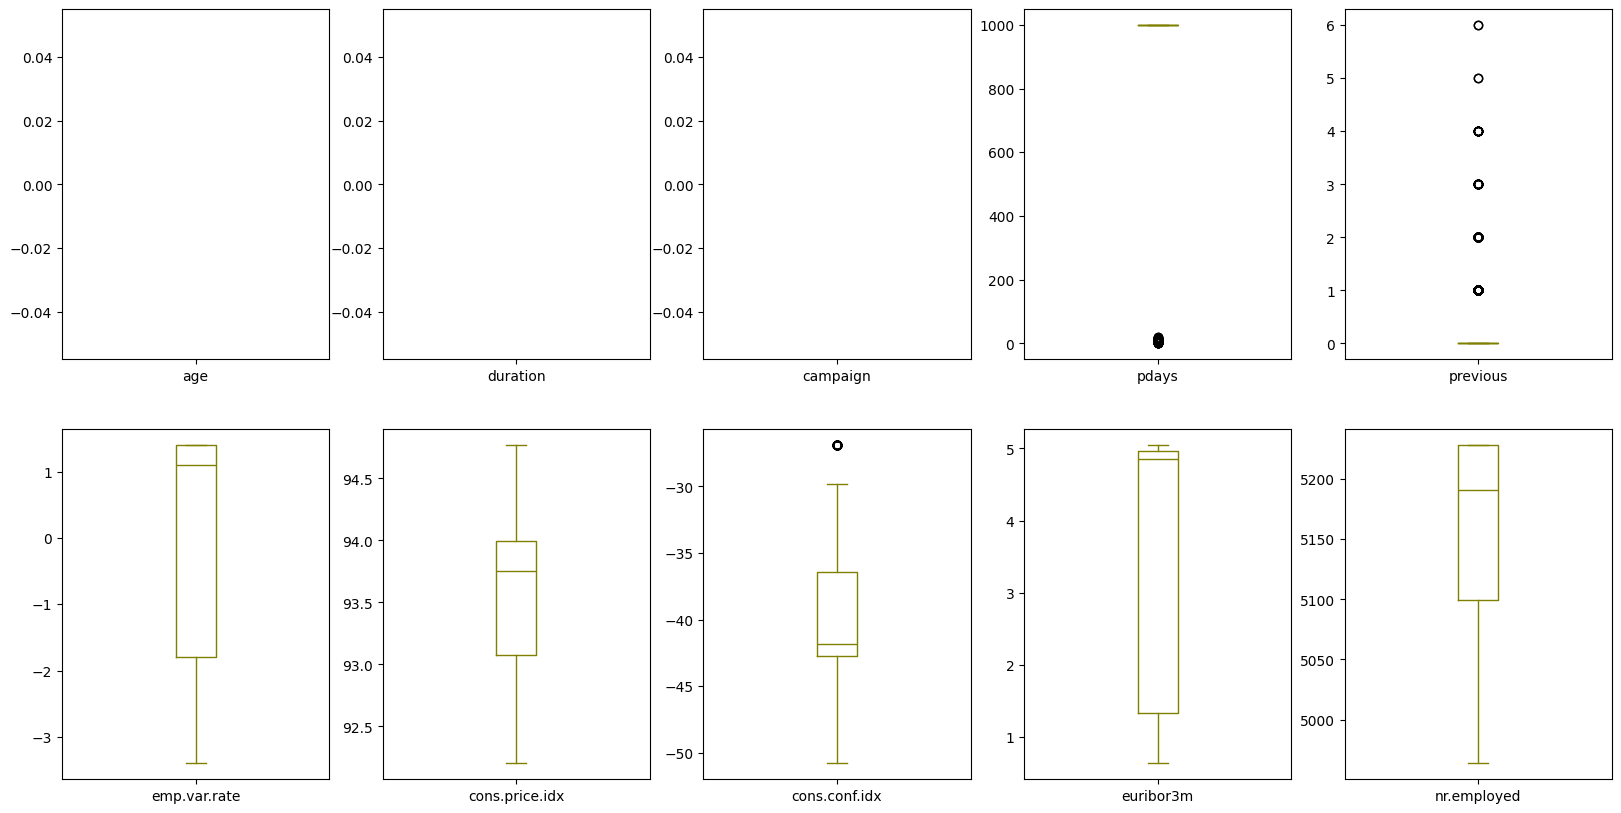

In [71]:
df.plot(kind='box', subplots=True, layout=(2,5),figsize=(20,10),color='#808000')
plt.show()

                age  duration  campaign     pdays  previous  emp.var.rate  \
age             NaN       NaN       NaN       NaN       NaN           NaN   
duration        NaN       NaN       NaN       NaN       NaN           NaN   
campaign        NaN       NaN       NaN       NaN       NaN           NaN   
pdays           NaN       NaN       NaN  1.000000 -0.587941      0.270684   
previous        NaN       NaN       NaN -0.587941  1.000000     -0.415238   
emp.var.rate    NaN       NaN       NaN  0.270684 -0.415238      1.000000   
cons.price.idx  NaN       NaN       NaN  0.058472 -0.164922      0.755155   
cons.conf.idx   NaN       NaN       NaN -0.092090 -0.051420      0.195022   
euribor3m       NaN       NaN       NaN  0.301478 -0.458851      0.970308   
nr.employed     NaN       NaN       NaN  0.381983 -0.514853      0.897173   

                cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
age                        NaN            NaN        NaN          NaN  
duration

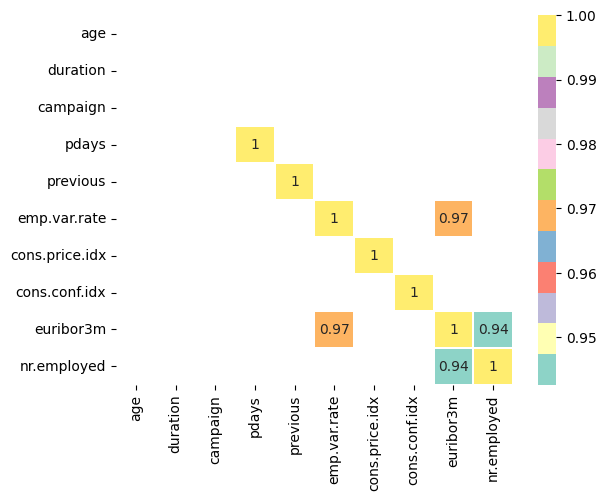

In [72]:
# Exclude non-numeric columns
numeric_df = df.drop(columns=cat_cols)

# Compute the correlation matrix
corr = numeric_df.corr()

# Print the correlation matrix
print(corr)

# Filter correlations with absolute value >= 0.90
corr = corr[abs(corr) >= 0.90]

sns.heatmap(corr,annot=True,cmap='Set3',linewidths=0.2)
plt.show()

In [73]:
high_corr_cols = ['emp.var.rate','euribor3m','nr.employed']

In [74]:
df1 = df.copy()
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [75]:
df1.shape

(4119, 21)

In [76]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_encoded = df1.apply(lb.fit_transform)
df_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,0,1,1,2,0,2,0,0,6,0,...,0,20,0,1,3,8,4,156,6,0
1,0,7,2,3,0,0,0,1,6,0,...,0,20,0,1,8,18,16,207,8,0
2,0,7,1,3,0,2,0,1,4,4,...,0,20,0,1,9,23,8,225,10,0
3,0,7,1,2,0,1,1,1,4,0,...,0,20,0,1,9,23,8,222,10,0
4,0,0,1,6,0,2,0,0,7,1,...,0,20,0,1,7,11,7,201,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,0,0,1,1,0,2,2,0,3,2,...,0,20,0,1,9,17,6,221,10,0
4115,0,0,1,3,0,2,0,1,3,0,...,0,20,0,1,9,17,6,222,10,0
4116,0,8,2,3,0,0,0,0,6,1,...,0,20,1,0,3,8,4,160,6,0
4117,0,0,1,3,0,0,0,0,1,0,...,0,20,0,1,9,13,17,229,10,0


In [77]:
df_encoded['deposit'].value_counts()

deposit
0    3668
1     451
Name: count, dtype: int64

In [78]:
x = df_encoded.drop('deposit',axis=1)  # independent variable
y = df_encoded['deposit']              # dependent variable
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(4119, 20)
(4119,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [79]:
from sklearn.model_selection import train_test_split

In [80]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3089, 20)
(1030, 20)
(3089,)
(1030,)


In [81]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

def eval_model(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))

def mscore(model):
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print('Training Score',train_score)  
    print('Testing Score',test_score)

In [82]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [83]:
mscore(dt)

Training Score 0.9083845904823568
Testing Score 0.9009708737864077


In [84]:
ypred_dt = dt.predict(x_test)
print(ypred_dt)

[0 0 1 ... 0 0 0]


In [85]:
eval_model(y_test,ypred_dt)

Accuracy_Score 0.9009708737864077
Confusion Matrix
 [[902  28]
 [ 74  26]]
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       930
           1       0.48      0.26      0.34       100

    accuracy                           0.90      1030
   macro avg       0.70      0.61      0.64      1030
weighted avg       0.88      0.90      0.89      1030



In [86]:
from sklearn.tree import plot_tree

In [87]:
cn = ['no','yes']
fn = x_train.columns
print(fn)
print(cn)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
['no', 'yes']


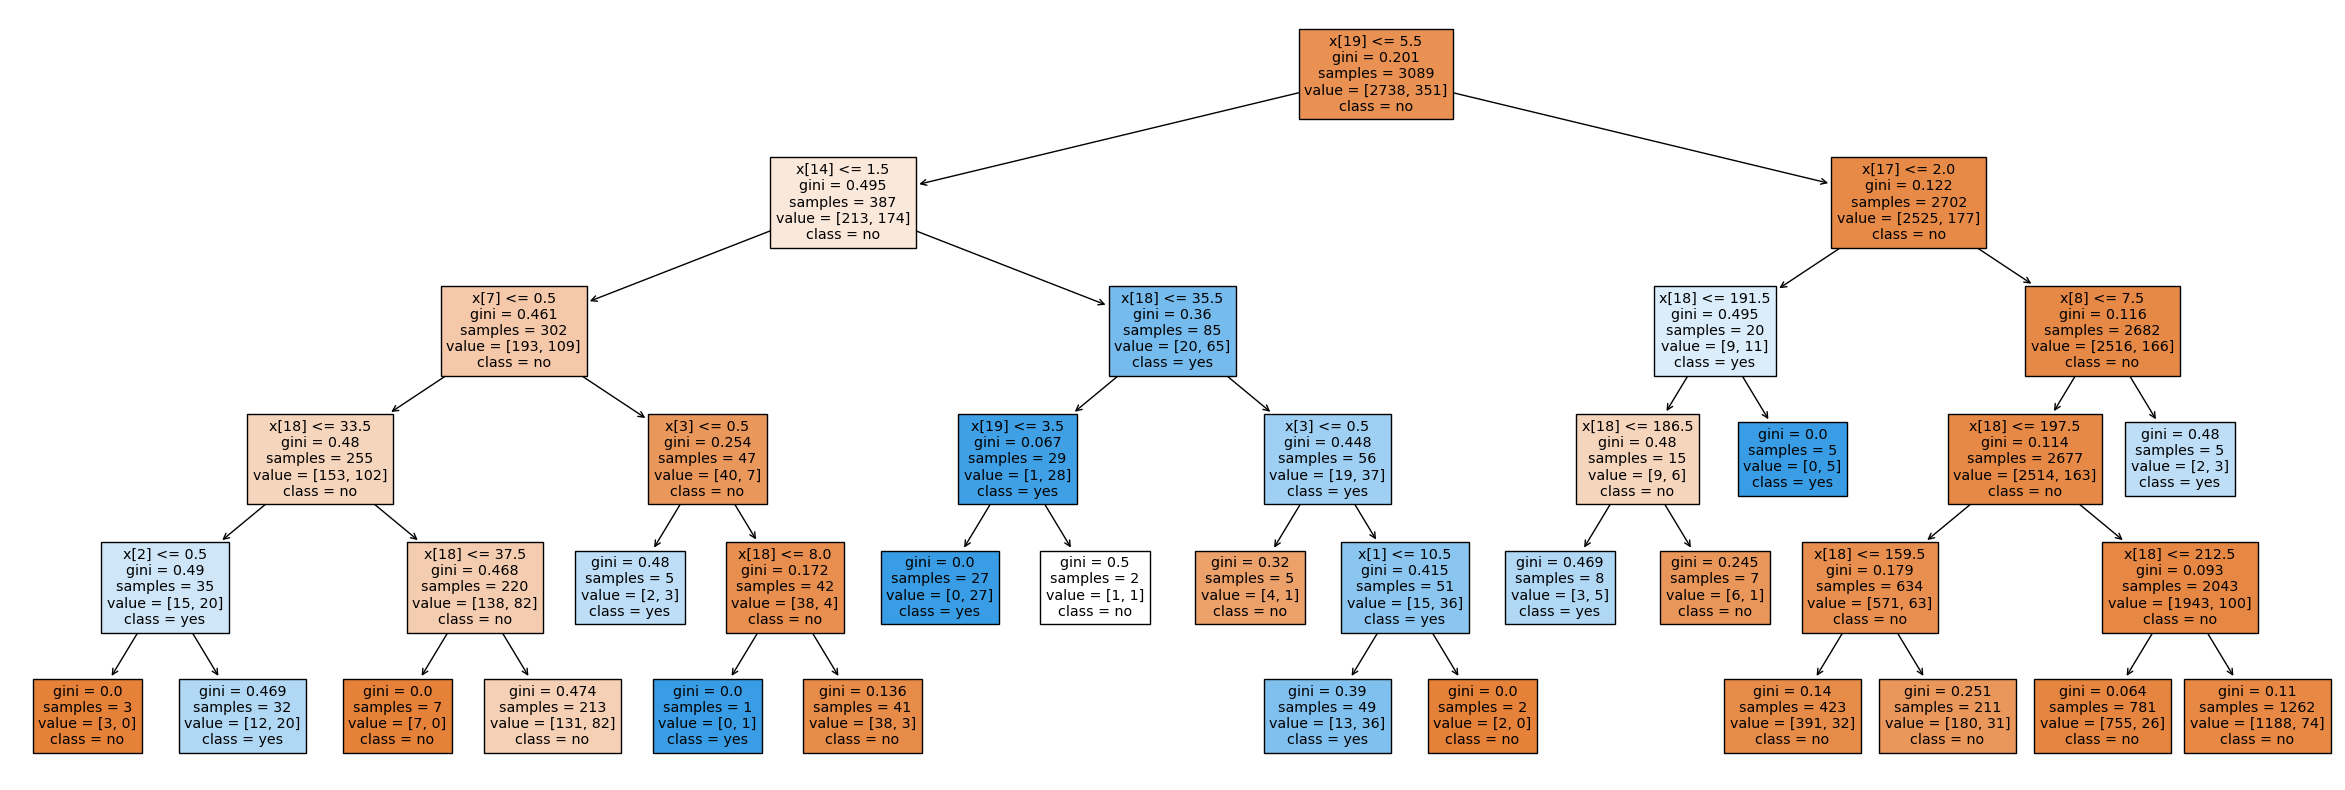

In [88]:
plt.figure(figsize=(30,10))
plot_tree(dt,class_names=cn,filled=True)
plt.show()

In [89]:
dt1 = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [90]:
mscore(dt1)

Training Score 0.9061184849465846
Testing Score 0.9048543689320389


In [91]:
ypred_dt1 = dt1.predict(x_test)

In [92]:

eval_model(y_test,ypred_dt1)


Accuracy_Score 0.9048543689320389
Confusion Matrix
 [[907  23]
 [ 75  25]]
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       930
           1       0.52      0.25      0.34       100

    accuracy                           0.90      1030
   macro avg       0.72      0.61      0.64      1030
weighted avg       0.88      0.90      0.89      1030



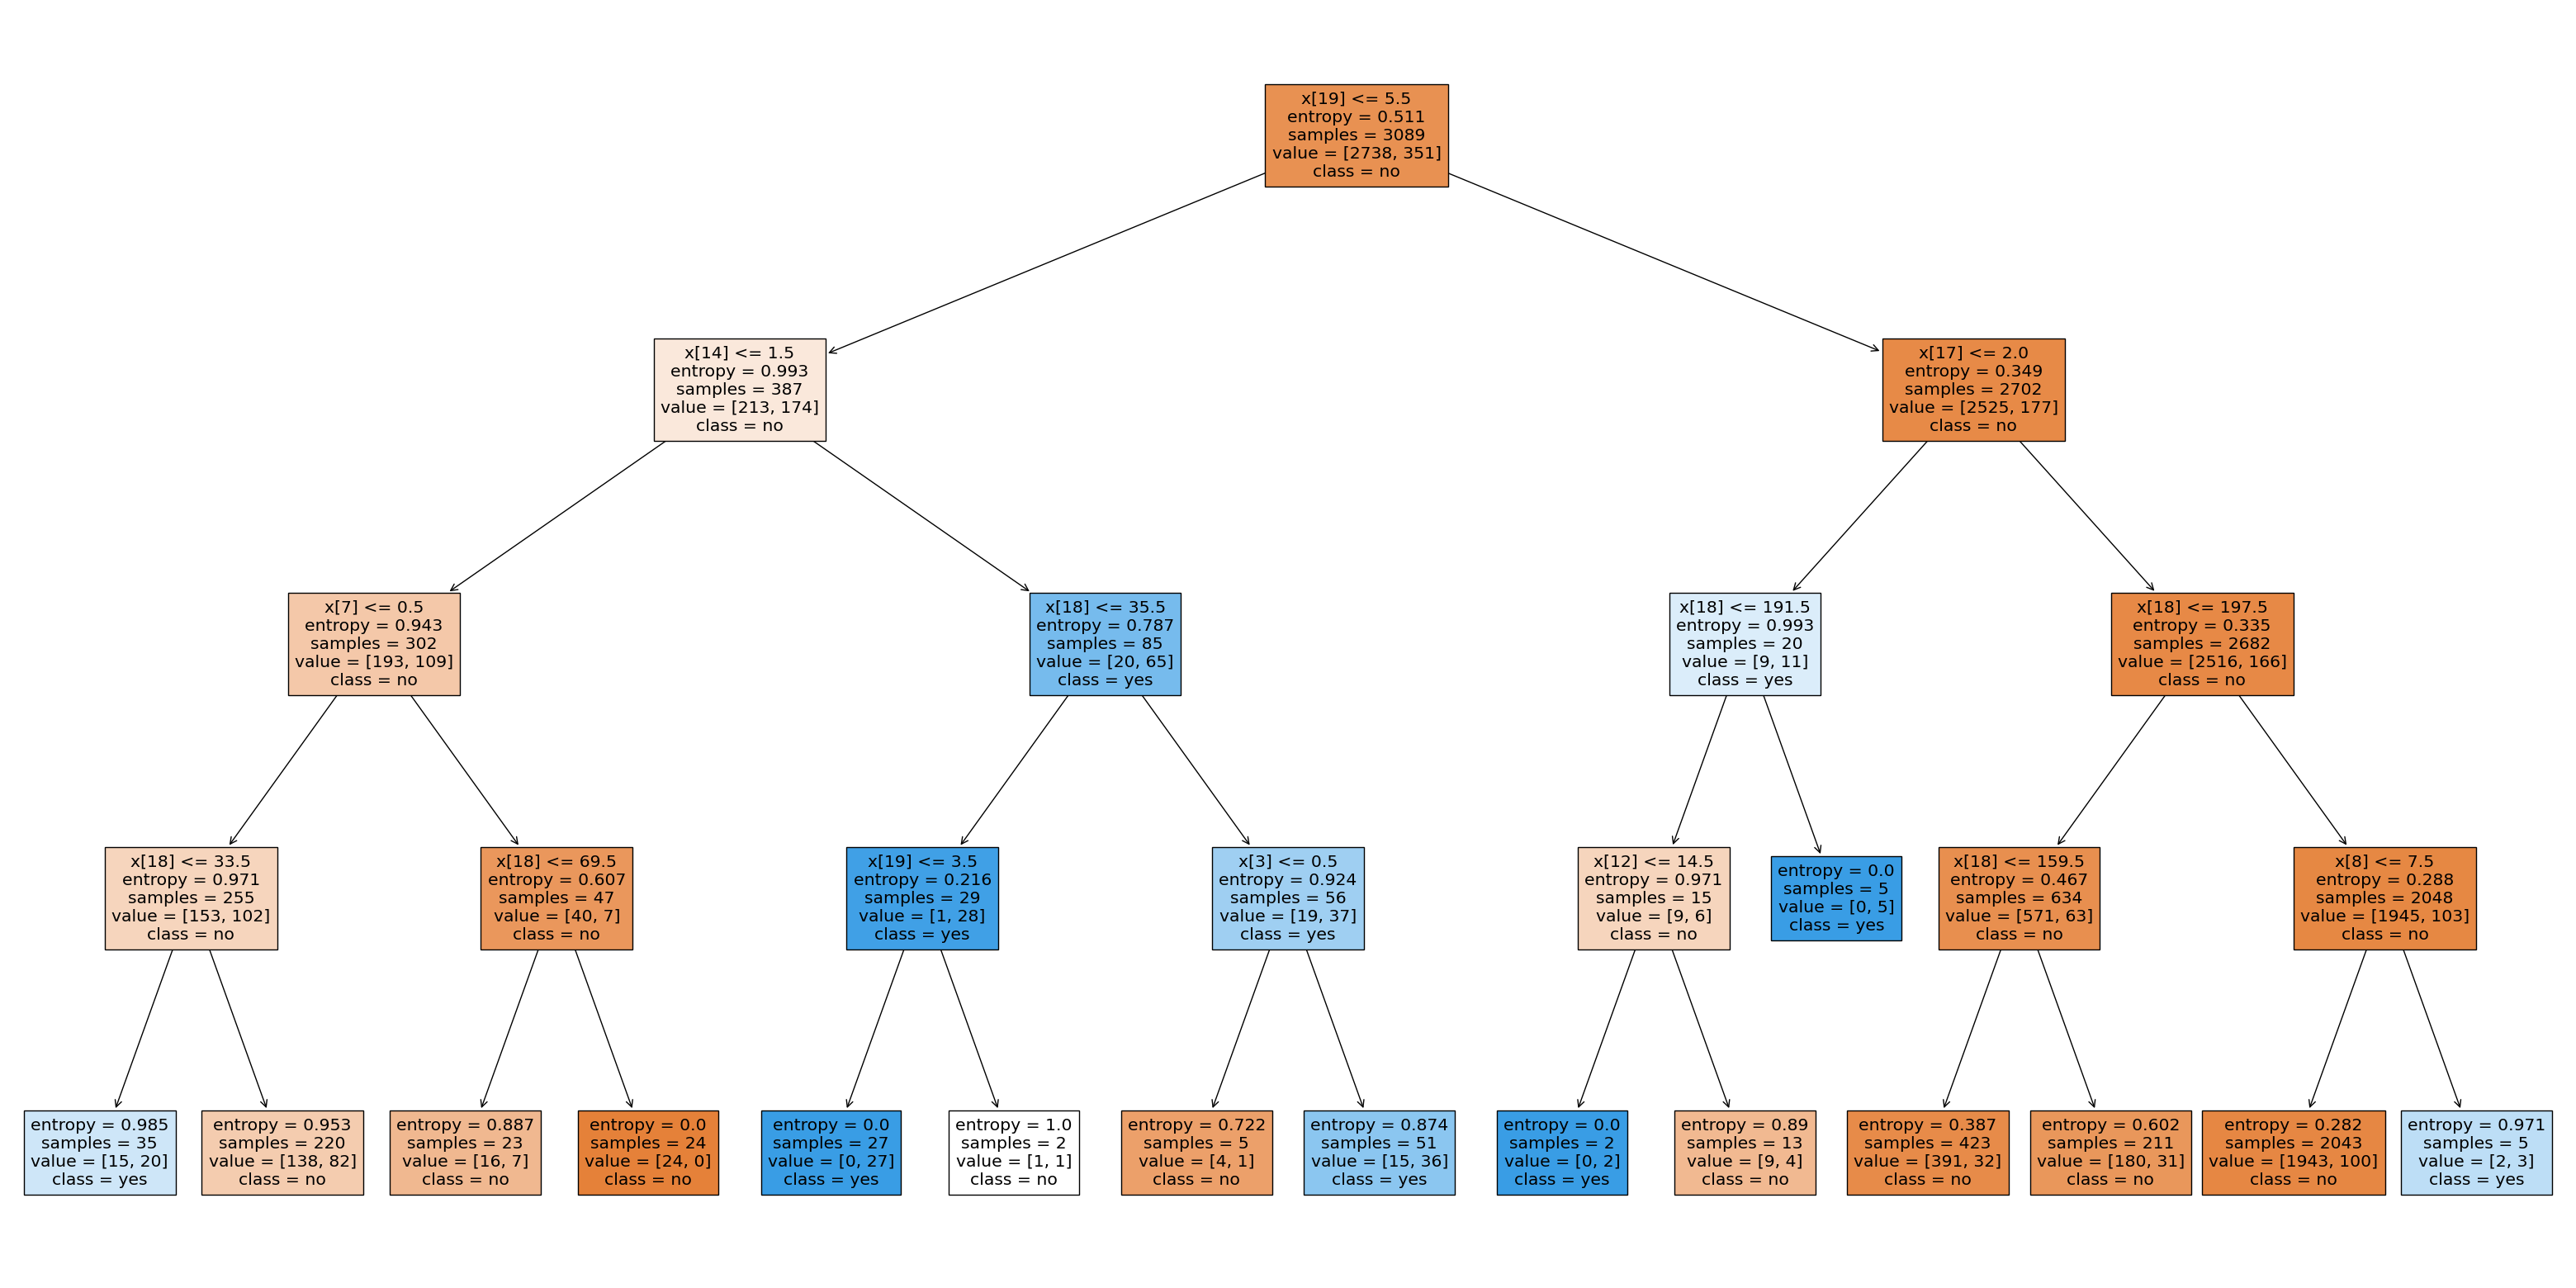

In [93]:
plt.figure(figsize=(40,20))
plot_tree(dt1,class_names=cn,filled=True)
plt.show()